In [1]:
%pylab inline
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import pandas as pd
import mdtraj as md
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from MDAnalysis.lib.distances import calc_angles
from MDAnalysis.lib.distances import calc_bonds
from glob import glob

import pickle

import warnings

warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [15]:
tiedname=['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10']
R_open_data_path='/www/yang/R_open/'
H_open_data_path='/www/yang/H_open/'
R_closed_data_path='/www/yang/R_close/'
H_closed_data_path='/www/yang/H_close/'

### 质心计算

In [2]:
def compute_center_of_mass(traj,atom_indices=None):
    if atom_indices==None:
        atoms = traj.top.atoms
        coords = traj.xyz
    else:
        atoms = [traj.top.atom(i) for i in atom_indices]
        coords = np.take(traj.xyz, atom_indices, axis=1)
    com = np.zeros((traj.n_frames, 3))
    masses = np.array([a.element.mass for a in atoms])
    masses /= masses.sum()
    for i, x in enumerate(coords):
        com[i, :] = x.astype('float64').T.dot(masses)
    return com

### angle 计算

In [17]:
def plot_angle(trajfile,topfile,tied_name,color,picture_id,list1,list2,list3,save_path):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = color
    top_h = md.load(topfile)
    
    for r in tied_name:
        traj = md.load(trajfile + r + "/pro.xtc", top=top_h)
        mass1 = compute_center_of_mass(traj,list1).astype(np.float32)
        mass2 = compute_center_of_mass(traj,list2).astype(np.float32)
        mass3 = compute_center_of_mass(traj,list3).astype(np.float32)
        angle_list = []
        angles = calc_angles(mass1,mass2,mass3)
        angle_list.append(angles)
        ax = gca()
        ax.plot(angles,color=next(colors),linewidth=0.36)
     
    font={'size':15,
         'weight':'bold',}
    legend(["r1","r2","r3","r4","r5",
            "r6","r7","r8","r9","r10"],
            loc="upper center",ncol=5,prop=font)
    plt.text(100,2.28, '%s'%(picture_id), fontsize=15, weight='bold')
    
    xlim(0,10100)
    xticks(range(0,10010,1000),range(0,101,10),weight='bold',fontsize=15)
    ylim(0.0,2.4)
    yticks(arange(0.0,2.42,0.6),weight='bold',fontsize=15)
    xlabel('Time (ns)', fontsize=16, weight='bold')
    ylabel('Angle (rad)', fontsize=16, weight='bold')
    savefig(save_path,dpi=900)

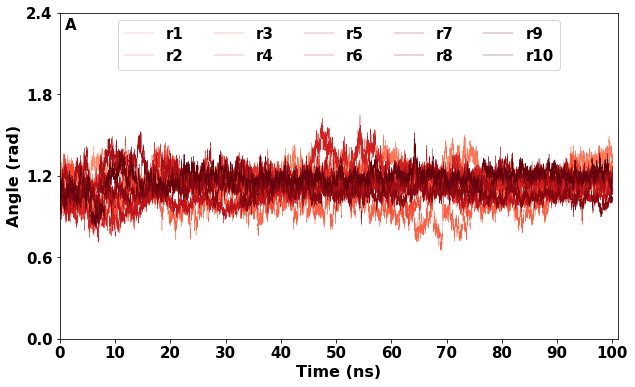

In [18]:
# R_open mdtraj Angle

# v1/v2(LNC - YRL)  98-168  原子781-1332    ***   
# β20 -β21(QII-AMY) 398-411   ***
# α1(NMV-QSL) 68-85 ***

trajfile = R_open_data_path
topfile = '/www/yang/R_open/r2_bound.pdb'

list1 = []
list2 = []
list3 = [] 

for i in range(98,169):
    list1.append(i)
for j in range(398,412):
    list2.append(j)
for k in range(68,86):
    list3.append(k)

color= iter(cm.Reds(np.linspace(0.39, 1, 10)))
picture_id = 'A'
save_path = '/home/dldx/R-H/code/supplementary/S5/R_open_angle.jpg'
    
plot_angle(trajfile,topfile,tiedname,color,picture_id,list1,list2,list3,save_path)

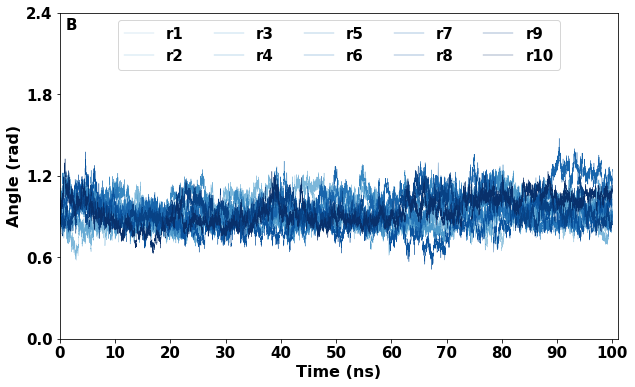

In [19]:
# H_open mdtraj Angle

# v1/v2(LNC - YRL)  98-168  原子791-1361    ***        βB-βC(MKN-LFY)  123-146
# β20 -β21 (QIV-AMY) 391-404     ***
# α1 (DMV-QSL) 68-85  ***

trajfile = H_open_data_path
topfile = '/www/yang/H_open/H-bound.pdb'

list1 = []
list2 = []
list3 = [] 

for i in range(98,169):
    list1.append(i)
for j in range(391,405):
    list2.append(j)
for k in range(68,86):
    list3.append(k)

color= iter(cm.Blues(np.linspace(0.39, 1, 10)))
picture_id = 'B'
save_path = '/home/dldx/R-H/code/supplementary/S5/H_open_angle.jpg'
    
plot_angle(trajfile,topfile,tiedname,color,picture_id,list1,list2,list3,save_path)

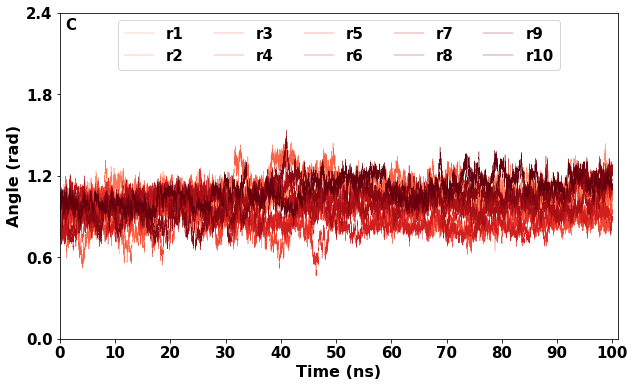

In [20]:
# R_close mdtraj Angle

# v1/v2(LNC - YRL)  98-168  原子781-1332    ***
# β20 -β21(QII-AMY) 398-411   ***
# α1(NMV-QSL) 68-85   ***

trajfile = R_closed_data_path
topfile = '/www/yang/R_close/r2_unbound.pdb'

list1 = []
list2 = []
list3 = [] 

for i in range(98,169):
    list1.append(i)
for j in range(398,412):
    list2.append(j)
for k in range(68,86):
    list3.append(k)

color= iter(cm.Reds(np.linspace(0.39, 1, 10)))
picture_id = 'C'
save_path = '/home/dldx/R-H/code/supplementary/S5/R_close_angle.jpg'
    
plot_angle(trajfile,topfile,tiedname,color,picture_id,list1,list2,list3,save_path)

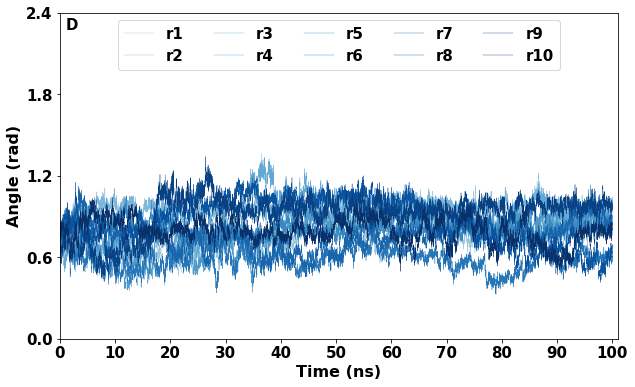

In [21]:
# H_close mdtraj Angle

# v1/v2(LNC - YRL)  98-168  原子791-1361    ***
# β20 -β21 (QIV-AMY) 391-404     ***
# α1 (DMV-QSL) 68-85  ***

trajfile = H_closed_data_path
topfile = '/www/yang/H_close/H-unbound.pdb'

list1 = []
list2 = []
list3 = [] 

for i in range(98,169):
    list1.append(i)
for j in range(391,405):
    list2.append(j)
for k in range(68,86):
    list3.append(k)

color= iter(cm.Blues(np.linspace(0.39, 1, 10)))
picture_id = 'D'
save_path = '/home/dldx/R-H/code/supplementary/S5/H_close_angle.jpg'
    
plot_angle(trajfile,topfile,tiedname,color,picture_id,list1,list2,list3,save_path)